In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Other import
import sys


from sklearn.preprocessing import StandardScaler

In [2]:
# Extract data
data = pd.read_csv("./data/project_train.csv")
inputs = data.iloc[:,:11]
labels = data.iloc[:,11]
inputs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.545,0.884,5,-4.807,0,0.367,0.290000,0.000000,0.370,0.641,86.049
1,0.795,0.545,7,-8.153,1,0.343,0.003960,0.000000,0.273,0.809,91.967
2,0.489,0.871,5,-5.825,1,0.386,0.002850,0.000004,0.130,0.341,117.431
3,0.539,0.931,4,-1.803,0,0.262,0.000713,0.000000,0.204,0.685,85.571
4,0.918,0.734,11,-2.832,0,0.269,0.029400,0.000008,0.191,0.608,97.044


In [3]:
from sklearn.model_selection import train_test_split

# Scale data
scaler = StandardScaler()
inputs = scaler.fit_transform(inputs)

# Split training and test data
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs, labels, test_size=0.2, random_state=1)

In [4]:
# Create the model
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(80, activation="relu"))
model.add(tf.keras.layers.Dense(80, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

In [5]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [6]:
history = model.fit(inputs_train, labels_train, epochs=60, validation_split=0.3)

Epoch 1/60


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


9/9 [==============================] - 0s 18ms/step - loss: 0.7929 - accuracy: 0.4149 - val_loss: 0.7382 - val_accuracy: 0.3934
Epoch 2/60
9/9 [==============================] - 0s 6ms/step - loss: 0.7329 - accuracy: 0.4468 - val_loss: 0.6976 - val_accuracy: 0.4508
Epoch 3/60
9/9 [==============================] - 0s 4ms/step - loss: 0.6900 - accuracy: 0.5390 - val_loss: 0.6667 - val_accuracy: 0.5902
Epoch 4/60
9/9 [==============================] - 0s 4ms/step - loss: 0.6581 - accuracy: 0.6383 - val_loss: 0.6422 - val_accuracy: 0.6721
Epoch 5/60
9/9 [==============================] - 0s 5ms/step - loss: 0.6325 - accuracy: 0.7199 - val_loss: 0.6225 - val_accuracy: 0.7049
Epoch 6/60
9/9 [==============================] - 0s 4ms/step - loss: 0.6121 - accuracy: 0.7482 - val_loss: 0.6061 - val_accuracy: 0.7295
Epoch 7/60
9/9 [==============================] - 0s 4ms/step - loss: 0.5949 - accuracy: 0.7518 - val_loss: 0.5920 - val_accuracy: 0.7623
Epoch 8/60
9/9 [============================

9/9 [==============================] - 0s 6ms/step - loss: 0.3886 - accuracy: 0.8333 - val_loss: 0.4564 - val_accuracy: 0.8279


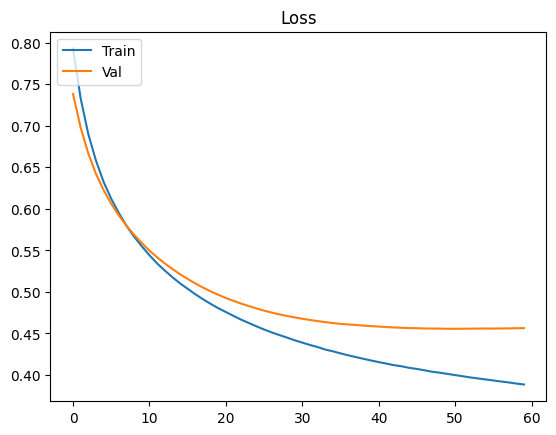

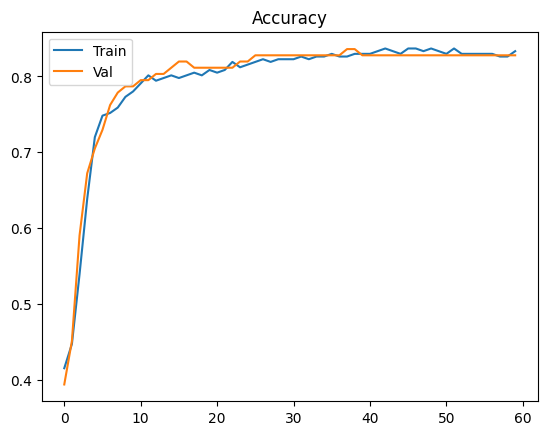

In [7]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [8]:
loss, acc = model.evaluate(inputs_test, labels_test)
print("Test loss", loss)
print("Train accuracy", acc)

4/4 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8020
Test loss 0.4181874096393585
Train accuracy 0.801980197429657
